# Maria's part of the project...

# GOAL: Investigate the distribution and average cost of various room types offered by Airbnb lodging.

## Question 1 - How are the different types of rooms in each city distributed?
## Question 2 - What is the average cost of each type of space in the two cities?
       

In [1]:
#dependencies EVERYTHHING... just in case!
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#Study data files
nashville_path ="Resources/Nash_listings (3).csv"
nyc_path = "Resources/NYC_listings (2).csv"

nashville_data_df = pd.read_csv(nashville_path)
nyc_data_df = pd.read_csv(nyc_path)

#Display the data for preview
print(nashville_data_df.shape)
nashville_data_df.count()

(8584, 18)


id                                8584
name                              8584
host_id                           8584
host_name                         8584
neighbourhood_group                  0
neighbourhood                     8584
latitude                          8584
longitude                         8584
room_type                         8584
price                             8584
minimum_nights                    8584
number_of_reviews                 8584
last_review                       7447
reviews_per_month                 7447
calculated_host_listings_count    8584
availability_365                  8584
number_of_reviews_ltm             8584
license                             10
dtype: int64

In [3]:
print(nyc_data_df.shape)
nyc_data_df.count()

(38792, 18)


id                                38792
name                              38792
host_id                           38792
host_name                         38787
neighbourhood_group               38792
neighbourhood                     38792
latitude                          38792
longitude                         38792
room_type                         38792
price                             38792
minimum_nights                    38792
number_of_reviews                 38792
last_review                       28440
reviews_per_month                 28440
calculated_host_listings_count    38792
availability_365                  38792
number_of_reviews_ltm             38792
license                            2939
dtype: int64

In [4]:
#Determine the categories included in the given data
labels = nyc_data_df['room_type'].unique()
print(labels)

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [5]:
#Clean and reduce the dataframe to keep only needed information
clean_nyc_data_df = nyc_data_df[['neighbourhood','room_type','price']]
clean_nash_data_df = nashville_data_df[['neighbourhood','room_type','price']]

clean_nyc_data_df.head()

,neighbourhood,room_type,price
0,Midtown,Entire home/apt,240
1,Bedford-Stuyvesant,Private room,66
2,Williamsburg,Entire home/apt,81
3,East Harlem,Private room,65
4,Williamsburg,Private room,95


In [6]:
clean_nash_data_df.head()

,neighbourhood,room_type,price
0,District 6,Private room,43
1,District 25,Private room,70
2,District 12,Private room,45
3,District 18,Entire home/apt,119
4,District 12,Private room,39


In [17]:
# Export the NYC_Data into a csv
clean_nyc_data_df.to_csv("output_data/cities.csv")
clean_nash_data_df.to_csv("output_data/cities.csv")

C:\Users\PDM77\AppData\Local\Temp\ipykernel_15396\393496719.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches2,labels=labels2, loc="lower left")
C:\Users\PDM77\AppData\Local\Temp\ipykernel_15396\393496719.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches1, labels= labels1, loc="lower left")


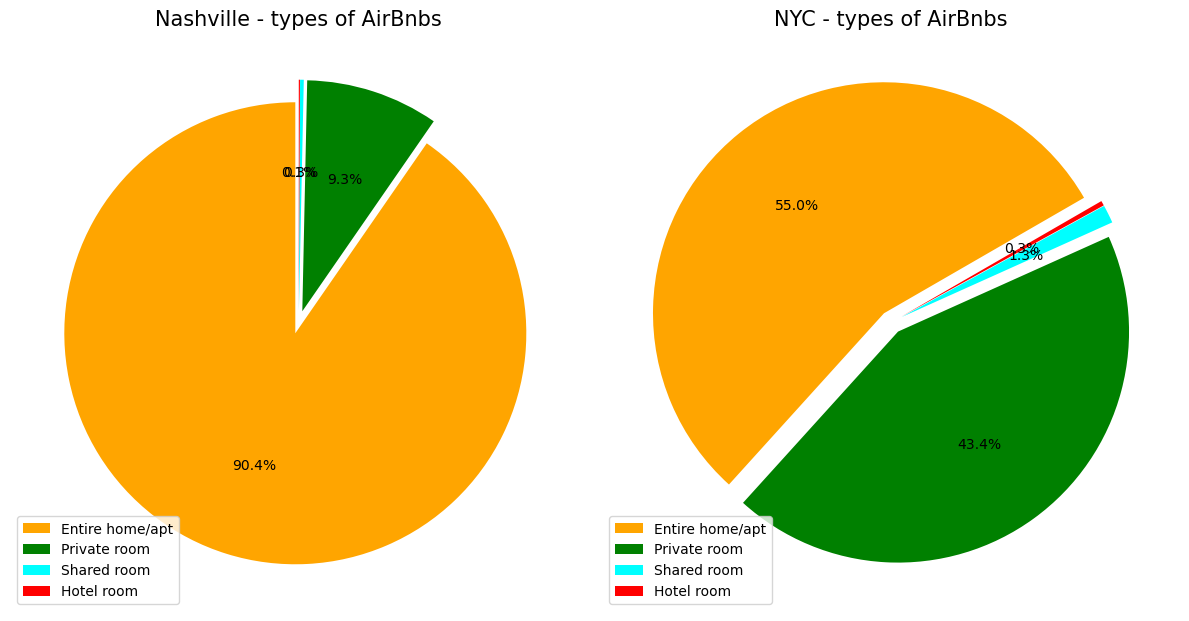

In [18]:
colors = ['orange', 'green', 'cyan','red']
explode = [0.05, 0.05, 0.05, 0.05]

# Example data for the first pie chart
type_nyc = clean_nyc_data_df['room_type'].value_counts()
labels1 = clean_nyc_data_df['room_type'].unique()

# Example data for the second pie chart
type_nash = clean_nash_data_df['room_type'].value_counts()
labels2 = clean_nyc_data_df['room_type'].unique()

# Create a figure with two subplots in a single row
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

# First pie chart on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
patches2, texts2, autotexts2 = plt.pie(type_nash, colors=colors, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend(patches2,labels=labels2, loc="lower left")
plt.title("Nashville - types of AirBnbs", fontsize=15)

# Second pie chart on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
patches1, texts1, autotexts1 = plt.pie(type_nyc, colors=colors, explode = explode, startangle=30, autopct='%1.1f%%')
plt.legend(patches1, labels= labels1, loc="lower left")
plt.title("NYC - types of AirBnbs", fontsize=15)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Pie1.png")

# Display the pie charts
plt.show()


In [8]:
# View raw numbers for NYC
type_nyc

room_type
Entire home/apt    21319
Private room       16849
Shared room          492
Hotel room           132
Name: count, dtype: int64

In [9]:
# View raw numbers for Nashville
type_nash

room_type
Entire home/apt    7757
Private room        798
Hotel room           22
Shared room           7
Name: count, dtype: int64

In [10]:
#Find average cost for each type of space in Nashville
nash_type_avg = clean_nash_data_df.groupby('room_type')['price'].mean()
nash_type_avg

room_type
Entire home/apt    287.935284
Hotel room         253.227273
Private room       181.279449
Shared room        180.142857
Name: price, dtype: float64

In [11]:
#Find average cost for each type of space in NYC
nyc_type_avg = clean_nyc_data_df.groupby('room_type')['price'].mean()
nyc_type_avg

room_type
Entire home/apt    262.527089
Hotel room         559.931818
Private room       156.341741
Shared room        146.432927
Name: price, dtype: float64

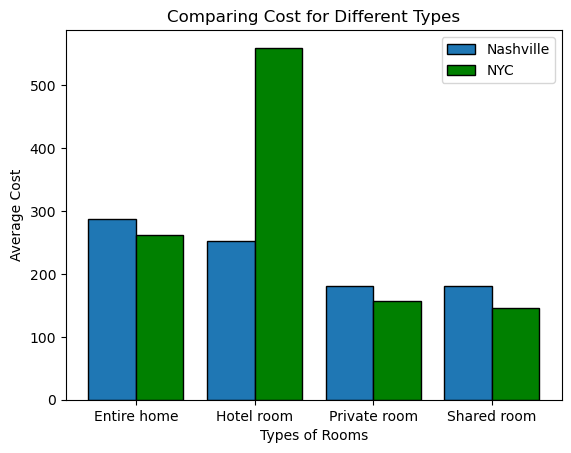

In [19]:
X = ['Entire home','Hotel room','Private room','Shared room'] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, nash_type_avg, 0.4, label = 'Nashville', edgecolor = 'black') 
plt.bar(X_axis + 0.2, nyc_type_avg, 0.4, label = 'NYC', color = 'g', edgecolor = 'black') 

plt.xticks(X_axis, X) 
plt.xlabel("Types of Rooms") 
plt.ylabel("Average Cost") 
plt.title("Comparing Cost for Different Types")  
plt.legend() 

# Save the figure
plt.savefig("output_data/Bar.png")
plt.show() 


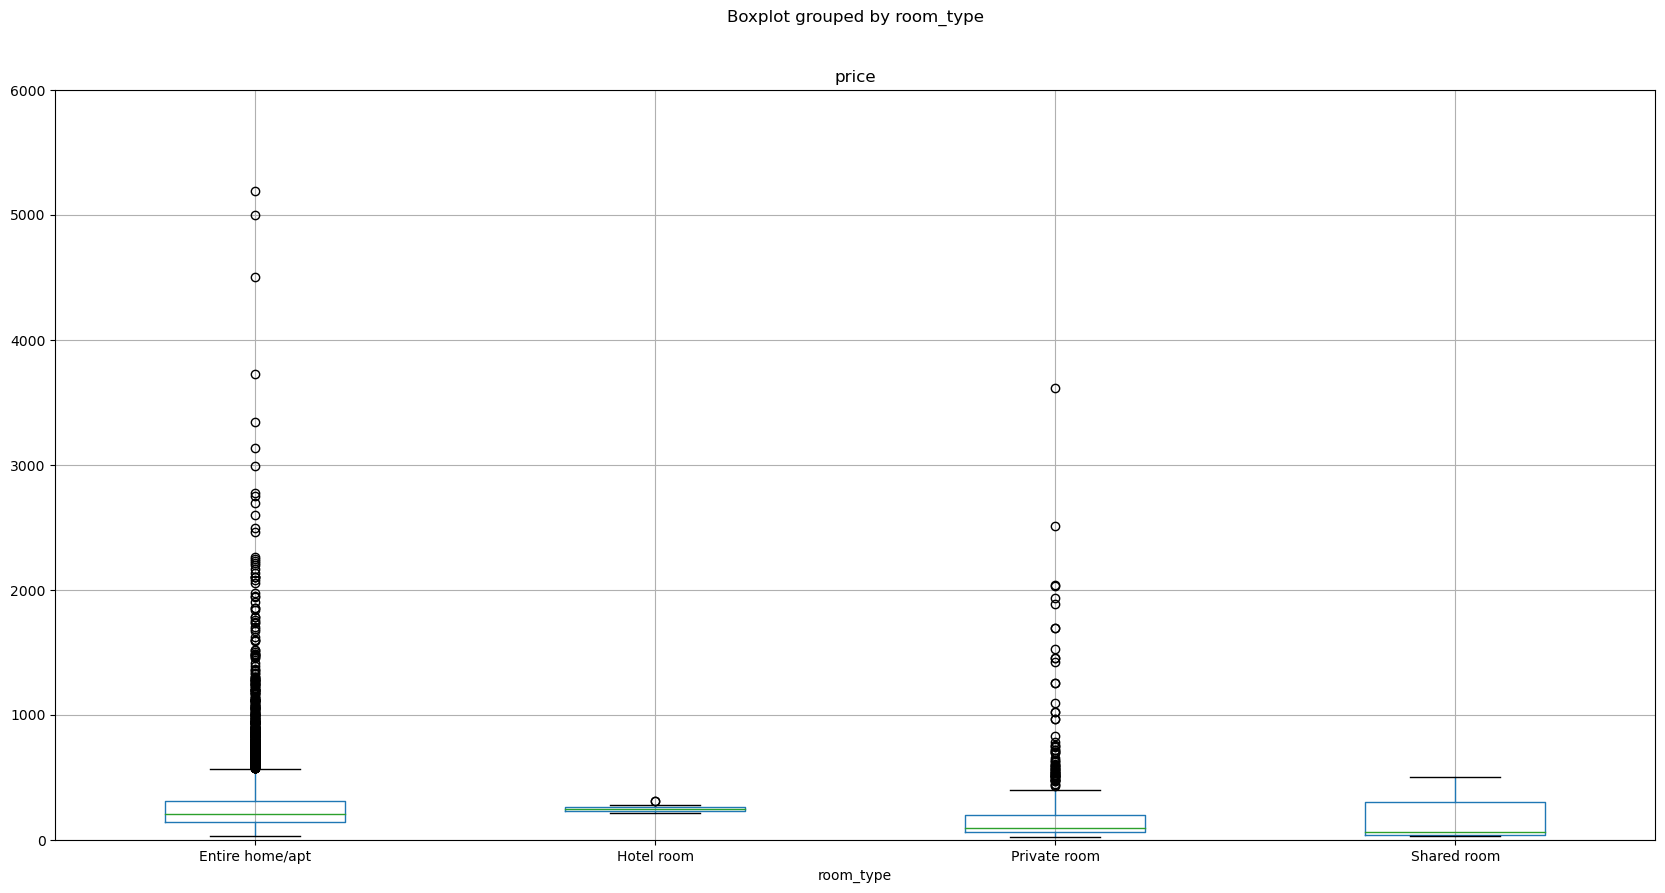

In [20]:
# Create a boxplot to compare means
nashville_data_df.boxplot("price", by="room_type", figsize=(20, 10))
plt.ylim(0, 6000)

# Save the figure
plt.savefig("output_data/Box1.png")

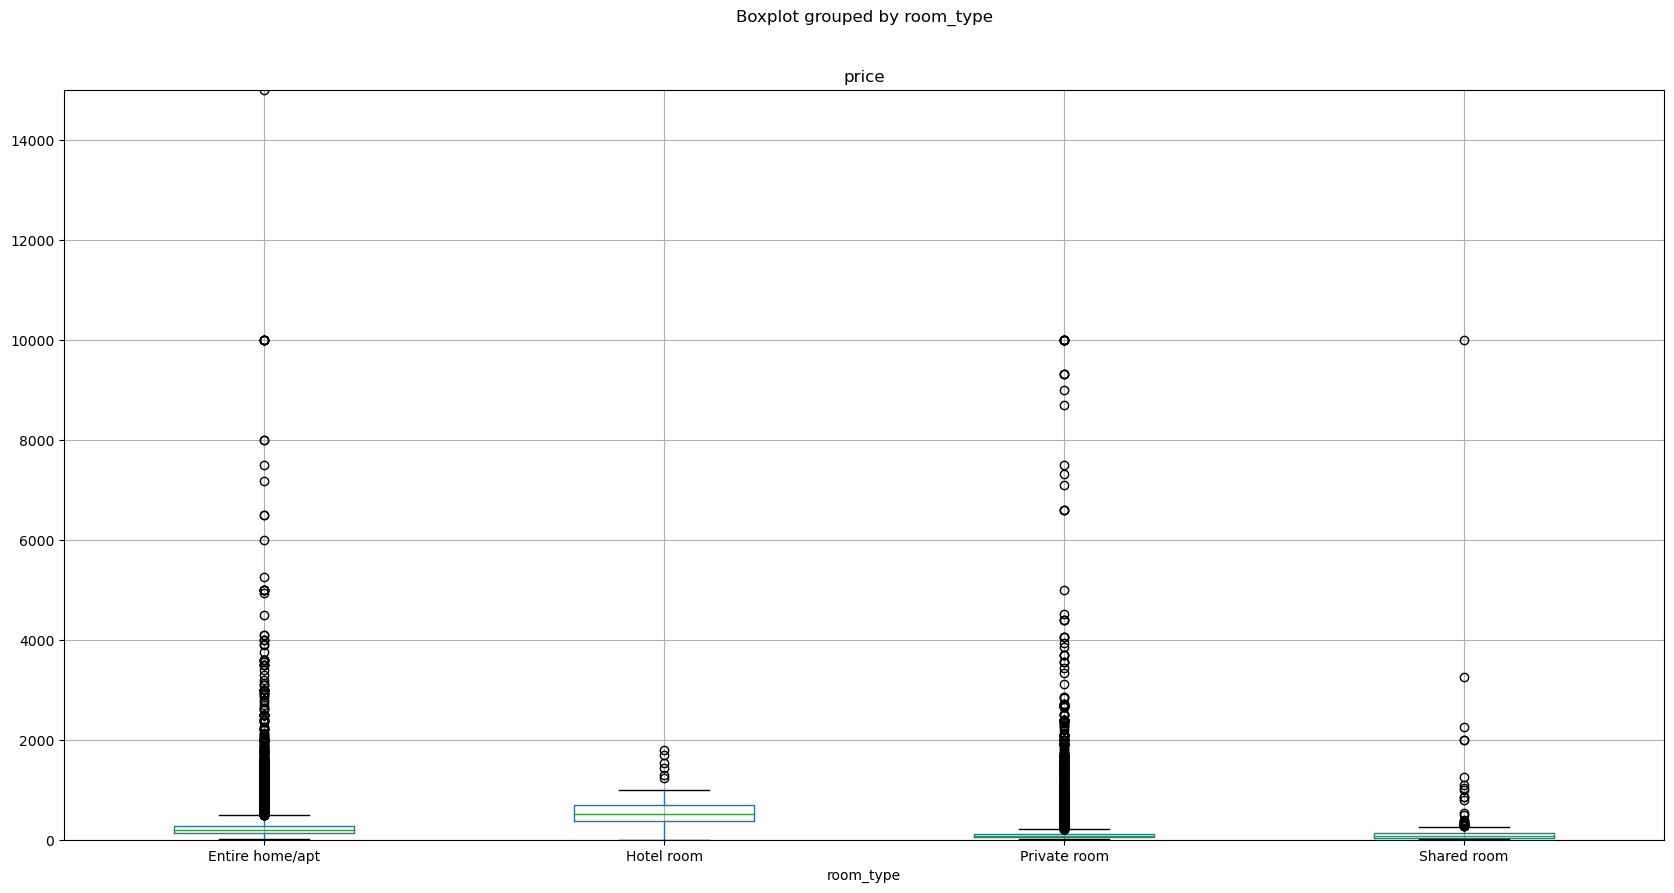

In [21]:
# Create a boxplot to compare means
nyc_data_df.boxplot("price", by="room_type", figsize=(20, 10))
plt.ylim(0, 15000)

# Save the figure
plt.savefig("output_data/Box2.png")

# Summary
## Question 1 - Distribution of Room Type

## Question 2 - Average Cost of Room Type
